In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# try to find k for generated 6 clusters and 3200 samples (All other params are the same)
# 1. loop over k = 2..20
# 2. calculate wss (within sum of squares)/sse = sigma(point-center)^2 = (x-x_center)^2 + (y-y_center)^2
# 3. draw sse vs k
# 4. choose the elbow k
# 5. which parameter will make choosing k more difficult (when creating the blobs)

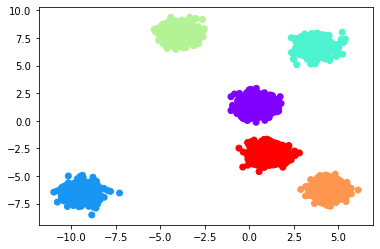

In [4]:
# Create Data
data = make_blobs(n_samples=3200, n_features=2, 
                           centers=6, cluster_std=0.5,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [6]:
kmeans.fit(data[0])

KMeans(n_clusters=2)

In [7]:
kmeans.predict(np.array([-10,10]).reshape(1,-1))

array([1])

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

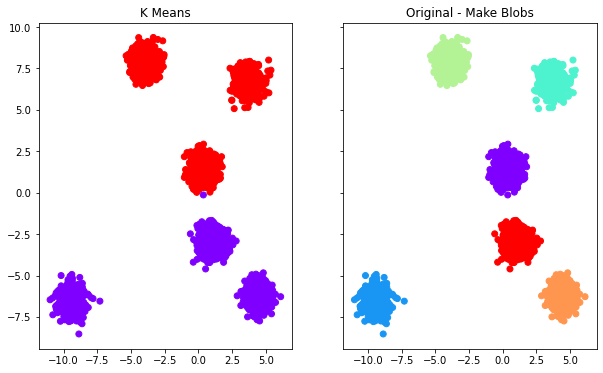

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original - Make Blobs")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Silhouette Method

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
s_scores = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k).fit(data[0])
    cents = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data[0])
    s_score = silhouette_score(data[0], pred_clusters)
    print(s_score)
    s_scores.append(s_score)

0.4955994707822029
0.6314917968742206
0.6876134274421348
0.7562367788352256
0.8390018448647396
0.7601329301919979
0.6564345259253628
0.5686274917277898
0.49105546894658486
0.40650101843661784
0.3966152497519157
0.318791495650097
0.3236105586625752
0.32922663266683827
0.332402801273836
0.33216870096843976
0.3368634713187278
0.3310225930221173
0.33122030428613086


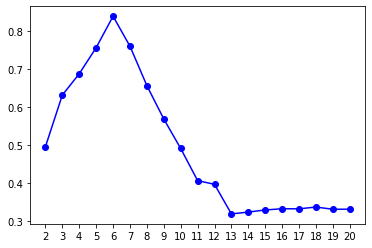

In [12]:
plt.xticks(range(1,21))
plt.plot(range(2,21), s_scores, "bo-", )